In [1]:
# Data set structured as follows:
# CSV File with two columns
# Column 1: Email
# Column 2: Spam or Ham (1 = spam, 0 = ham)
# This is a naive bayes models

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# Model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laila_tantavy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laila_tantavy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# importing training data set
data = pd.read_csv("emails_training.csv")
data.sample(5)

,text,spam
1634,Subject: spring 2001 academic calendar for the...,0
5472,Subject: weather delta demonstration meeting ...,0
1790,Subject: ceraweek 2000 update ! dear ceraweek...,0
610,Subject: you don _ t know how to get into sear...,1
1496,Subject: entouch newsletter business highligh...,0


In [16]:
# Data exploration
data.rename(columns={'text':'email'}, inplace=True)
data.head(5)

,email,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


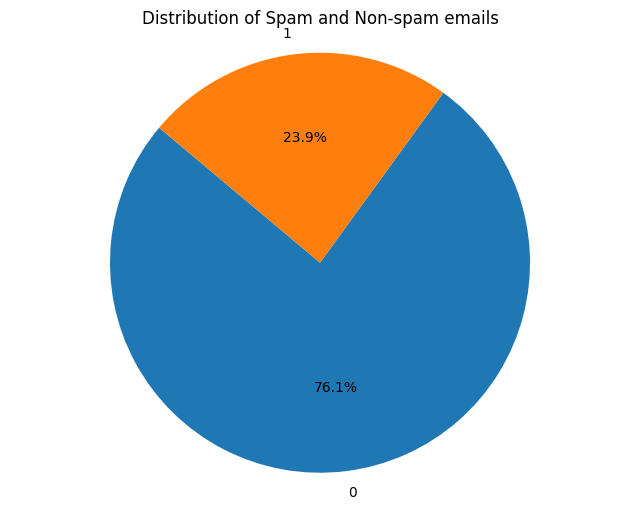

In [18]:
data['spam'].value_counts()
# Plotting
plt.figure(figsize=(8,6))
plt.pie(data['spam'].value_counts(), labels=data['spam'].value_counts().index, autopct="%1.1f%%",startangle=140)
plt.title('Distribution of Spam and Non-spam emails')
plt.axis('equal')
plt.show()

In [21]:
# Email stats
data['Length'] = data['email'].apply(len)
data['num_words'] = data['email'].apply(word_tokenize).apply(len)
data['num_sentences'] = data['email'].apply(sent_tokenize).apply(len)
data.head(2)

,email,spam,Length,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1


Average Length of Spam Emails:  1317.2573099415204
Average Length of Ham Emails:  1631.918119266055


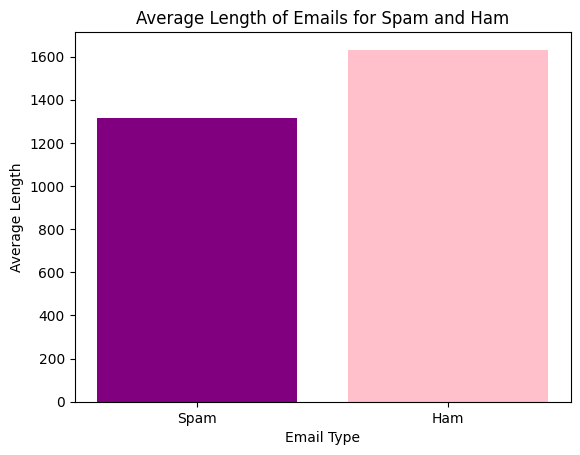

In [24]:
avg_length_spam = data[data['spam'] == 1]['Length'].mean()
avg_length_ham = data[data['spam'] == 0]['Length'].mean()
# plotting
print("Average Length of Spam Emails: ", avg_length_spam)
print("Average Length of Ham Emails: ", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Purple', 'Pink'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

Average Words in a Spam Email:  267.89619883040933
Average Words in a Ham Email:  346.83532110091744


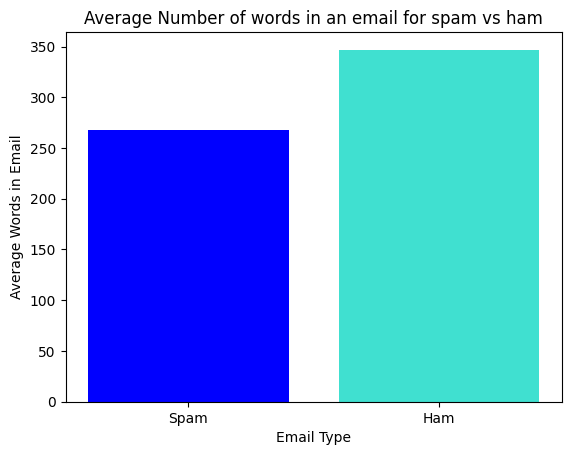

In [26]:
# average words
avg_word_spam = data[data['spam'] == 1]['num_words'].mean()
avg_word_ham = data[data['spam'] == 0]['num_words'].mean()
print("Average Words in a Spam Email: ", avg_word_spam)
print("Average Words in a Ham Email: ", avg_word_ham)

# plotting
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'Turquoise'])
plt.title('Average Number of words in an email for spam vs ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words in Email')
plt.show()

Average sentences in Spam Email:  18.274122807017545
Average sentences in Ham Email:  19.86261467889908


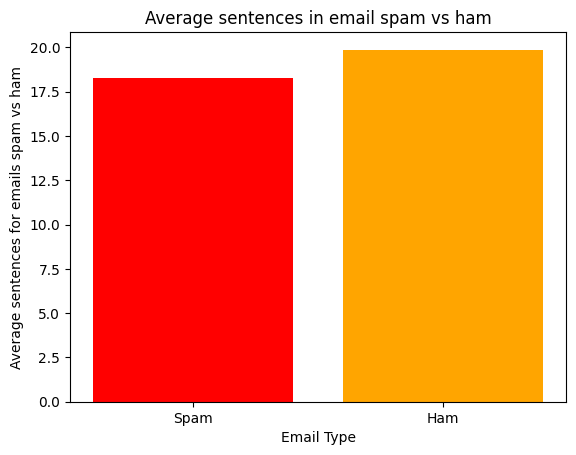

In [28]:
# average sentence of Emails for Spam and Ham
avg_sentence_spam = data[data['spam'] == 1]['num_sentences'].mean()
avg_sentence_ham = data[data['spam'] == 0]['num_sentences'].mean()
print("Average sentences in Spam Email: ", avg_sentence_spam)
print("Average sentences in Ham Email: ", avg_sentence_ham)

# plotting
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Red', 'Orange'])
plt.title('Average sentences in email spam vs ham')
plt.xlabel('Email Type')
plt.ylabel('Average sentences for emails spam vs ham')
plt.show()

Correlation coefficient between email length and spam classification is:  -0.0656855641180886


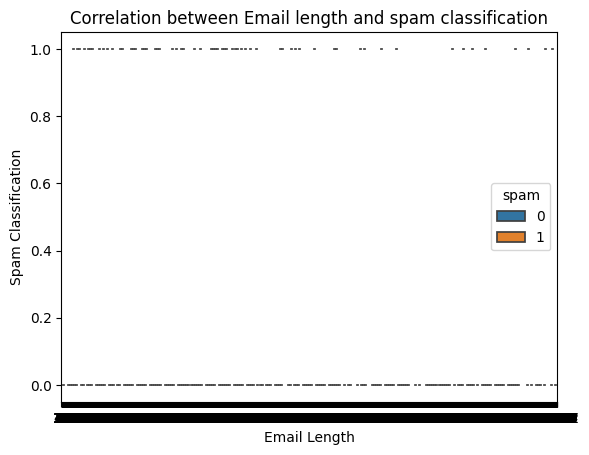

In [35]:
# relationship between length and spam
correlation = data['Length'].corr((data['spam'] == 1))
print('Correlation coefficient between email length and spam classification is: ', correlation)
sns.violinplot(data=data, x='Length', y='spam', hue='spam')
plt.xlabel('Email Length')
plt.ylabel('Spam Classification')
plt.title('Correlation between Email length and spam classification')
plt.show()

Relationship between features are: 
                  Length  num_words  num_sentences
Length         1.000000   0.986005       0.595949
num_words      0.986005   1.000000       0.660650
num_sentences  0.595949   0.660650       1.000000


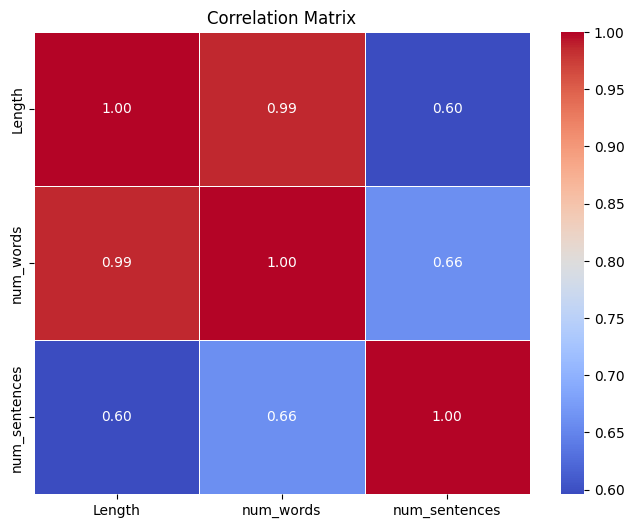

In [40]:
# relationship between features
correlation_mat = data[['Length', 'num_words', 'num_sentences']].corr()
print('Relationship between features are: \n', correlation_mat)

# on a matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
# data preprocessing
# Steps: change to lower case, remove special chars, delete stopwords and punctuation
data['transform_email'] = data['email'].str.lower() 
data['transform_email'] = data['transform_email'].apply(word_tokenize)
data['transform_email'] - data['transform_email'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])
stop_words = set(stopwords.words('english'))
data['transform_email'] = data['transform_email'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])
# Stemming -> makes data readable for nlp tasks
ps = PorterStemmer()
data['transform_email'] = data['transform_email'].apply(lambda x: [ps.stem(word) for word in x])
# converting back to string
data['transform_email'] = data['transform_email'].apply(lambda x: ' '.join(x))
print(data[['email', 'transform_email']])

TypeError: unsupported operand type(s) for -: 'list' and 'list'